In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import pandas as pd
import numpy as np
import re
import string
import nltk
from nltk.corpus import stopwords
stop = set(stopwords.words('english'))
from wordcloud import WordCloud, STOPWORDS
import matplotlib as plty
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import sklearn


import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from subprocess import check_output

%matplotlib inline
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls

import plotly.graph_objs as go
from sklearn import preprocessing
Encode = preprocessing.LabelEncoder()
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
tfid = TfidfVectorizer()
vect = CountVectorizer()
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.manifold import TSNE
NB = MultinomialNB()

import nltk
from nltk.corpus import stopwords
stopwords = stopwords.words("english")
from sklearn import metrics
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier



In [2]:
chatbot = pd.read_csv("Sheet_1.csv",usecols=['response_id','class','response_text'],encoding='latin-1')
resume = pd.read_csv("Sheet_2.csv",encoding='latin-1')

In [3]:
chatbot

,response_id,class,response_text
0,response_1,not_flagged,I try and avoid this sort of conflict
1,response_2,flagged,Had a friend open up to me about his mental ad...
2,response_3,flagged,I saved a girl from suicide once. She was goin...
3,response_4,not_flagged,i cant think of one really...i think i may hav...
4,response_5,not_flagged,Only really one friend who doesn't fit into th...
...,...,...,...
75,response_76,not_flagged,"Now that I've been through it, although i'm no..."
76,response_77,flagged,when my best friends mom past away from od'ing...
77,response_78,not_flagged,As a camp counselor I provide stability in kid...
78,response_79,flagged,My now girlfriend used to have serious addicti...


In [4]:
chatbot['class'].value_counts()


not_flagged    55
flagged        25
Name: class, dtype: int64

In [5]:
resume

,resume_id,class,resume_text
0,resume_1,not_flagged,\rCustomer Service Supervisor/Tier - Isabella ...
1,resume_2,not_flagged,\rEngineer / Scientist - IBM Microelectronics ...
2,resume_3,not_flagged,\rLTS Software Engineer Computational Lithogra...
3,resume_4,not_flagged,TUTOR\rWilliston VT - Email me on Indeed: ind...
4,resume_5,flagged,\rIndependent Consultant - Self-employed\rBurl...
...,...,...,...
120,resume_121,not_flagged,\rBrattleboro VT - Email me on Indeed: indeed....
121,resume_122,not_flagged,\rResearch and Teaching Assistant - University...
122,resume_123,not_flagged,\rMedical Coder - Highly Skilled - Entry Level...
123,resume_124,flagged,\rWaterbury VT - Email me on Indeed: indeed.co...


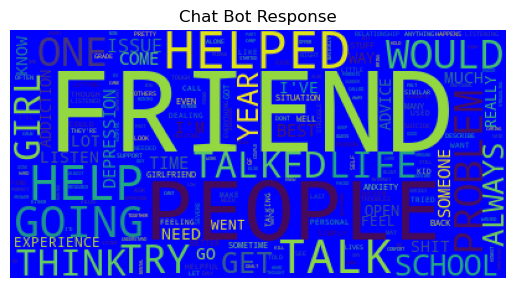

In [6]:
def cloud(text):
    wordcloud = WordCloud(background_color="blue",stopwords=stop).generate(" ".join([i for i in text.str.upper()]))
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.title("Chat Bot Response")
cloud(chatbot['response_text'])

In [7]:
chatbot['Label'] = Encode.fit_transform(chatbot['class'])


In [8]:
chatbot

,response_id,class,response_text,Label
0,response_1,not_flagged,I try and avoid this sort of conflict,1
1,response_2,flagged,Had a friend open up to me about his mental ad...,0
2,response_3,flagged,I saved a girl from suicide once. She was goin...,0
3,response_4,not_flagged,i cant think of one really...i think i may hav...,1
4,response_5,not_flagged,Only really one friend who doesn't fit into th...,1
...,...,...,...,...
75,response_76,not_flagged,"Now that I've been through it, although i'm no...",1
76,response_77,flagged,when my best friends mom past away from od'ing...,0
77,response_78,not_flagged,As a camp counselor I provide stability in kid...,1
78,response_79,flagged,My now girlfriend used to have serious addicti...,0


In [9]:
chatbot['Label'].value_counts()


1    55
0    25
Name: Label, dtype: int64

In [10]:
x = chatbot.response_text
y = chatbot.Label
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=1)
x_train_dtm = vect.fit_transform(x_train)
x_test_dtm = vect.transform(x_test)
NB.fit(x_train_dtm,y_train)
y_predict = NB.predict(x_test_dtm)
metrics.accuracy_score(y_test,y_predict)

0.7

In [11]:
rf = RandomForestClassifier(max_depth=10,max_features=10)
rf.fit(x_train_dtm,y_train)
rf_predict = rf.predict(x_test_dtm)
metrics.accuracy_score(y_test,rf_predict)

0.85

In [12]:
Chatbot_Text = chatbot["response_text"]
len(Chatbot_Text)

80

In [13]:
Tf_idf = CountVectorizer(max_features=256).fit_transform(Chatbot_Text.values)


In [14]:
tsne = TSNE(
    n_components=3,
    init='random', # pca
    random_state=101,
    method='barnes_hut',
    n_iter=300,
    verbose=2,
    angle=0.5
).fit_transform(Tf_idf.toarray())

C:\Users\himan\anaconda3\Lib\site-packages\sklearn\manifold\_t_sne.py:810: FutureWarning:

The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.



[t-SNE] Computing 79 nearest neighbors...
[t-SNE] Indexed 80 samples in 0.001s...
[t-SNE] Computed neighbors for 80 samples in 0.000s...
[t-SNE] Computed conditional probabilities for sample 80 / 80
[t-SNE] Mean sigma: 2.119036
[t-SNE] Computed conditional probabilities in 0.000s
[t-SNE] Iteration 50: error = 114.9579239, gradient norm = 0.1865210 (50 iterations in 0.050s)
[t-SNE] Iteration 100: error = 128.8542786, gradient norm = 0.0996633 (50 iterations in 0.024s)
[t-SNE] Iteration 150: error = 146.3176880, gradient norm = 0.1200780 (50 iterations in 0.055s)
[t-SNE] Iteration 200: error = 145.0300446, gradient norm = 0.0888677 (50 iterations in 0.022s)
[t-SNE] Iteration 250: error = 153.9753265, gradient norm = 0.0881155 (50 iterations in 0.029s)
[t-SNE] KL divergence after 250 iterations with early exaggeration: 153.975327
[t-SNE] Iteration 300: error = 3.2556207, gradient norm = 0.0002847 (50 iterations in 0.046s)
[t-SNE] KL divergence after 300 iterations: 3.255621


In [15]:
tsne

array([[ 1.12513504e+02,  3.37005280e+02,  3.44139648e+02],
       [-3.02197151e+01, -1.00735197e+01,  3.80220909e+01],
       [ 1.70502472e+01,  9.30993271e+00, -5.26670341e+01],
       [ 8.39256859e+00, -2.93582401e+01,  2.42053185e+01],
       [ 2.85783100e+00,  5.10224838e+01,  2.25457554e+01],
       [-3.86681442e+01,  3.11275864e+01, -1.98099279e+00],
       [ 4.24160919e+01,  2.66186028e+01, -1.81481152e+01],
       [ 3.23421364e+01, -1.34789801e+00, -2.21656437e+01],
       [ 1.85116920e+01, -3.62459755e+01, -5.80405712e+00],
       [ 3.17350292e+01,  7.83353710e+00,  3.52318726e+01],
       [ 4.24007034e+01,  7.04472363e-01,  1.69986172e+01],
       [ 6.04091911e+01, -2.30395546e+01, -3.10139217e+01],
       [-1.20480553e+02,  1.67356384e+02,  3.01921844e+01],
       [-9.78524327e-01,  7.42785645e+01,  6.11911821e+00],
       [ 5.95436325e+01, -4.69784737e+00,  2.71594639e+01],
       [ 3.07203007e+01,  3.10343876e+01,  3.65915608e+00],
       [ 2.43948097e+01,  3.58764343e+01

In [16]:
default_color = 'rgb(115,110,150)'  # Replace with your desired default color


In [17]:
trace1 = go.Scatter3d(
    x=tsne[:,0],
    y=tsne[:,1],
    z=tsne[:,2],
    mode='markers',
    marker=dict(
        sizemode='diameter',
        color = default_color,
        colorscale = 'Portland',
        colorbar = dict(title = 'TExt'),
        line=dict(color='rgb(255, 255, 255)'),
        opacity=0.75
    )
)

data=[trace1]
layout=dict(height=800, width=800, title='test')
fig=dict(data=data, layout=layout)
py.iplot(fig, filename='3DBubble')